In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split


In [2]:
alphabet_df=pd.read_csv("charity_data.csv")
alphabet_df.head(10)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
5,10556855,MINORITY ORGAN & TISSUE TRANSPLANT & EDUCATION...,T3,Independent,C1200,Preservation,Trust,1,0,N,5000,1
6,10558440,FRIENDS OF ARTS COUNCIL OF GREATER DENHAM SPRI...,T3,Independent,C1000,Preservation,Trust,1,100000-499999,N,31452,1
7,10566033,ISRAEL EMERGENCY ALLIANCE,T3,Independent,C2000,Preservation,Trust,1,10M-50M,N,7508025,1
8,10570430,ARAMCO BRATS INC,T7,Independent,C1000,ProductDev,Trust,1,1-9999,N,94389,1
9,10571689,INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0


In [3]:
alphabet_cat=alphabet_df.dtypes[alphabet_df.dtypes=="object"].index.tolist()

In [4]:
alphabet_df[alphabet_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [5]:
alphabet_df.drop(columns=["NAME"], inplace=True)
alphabet_df.head()

,EIN,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
#Applciation type
APPLICATION_TYPE_counts=alphabet_df.APPLICATION_TYPE.value_counts()
APPLICATION_TYPE_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
APPLICATION_TYPE_counts.plot.density()


In [8]:
# Bucket for Loop
new_APPLICATION_TYPE=list(APPLICATION_TYPE_counts[APPLICATION_TYPE_counts<1000].index)

for i in new_APPLICATION_TYPE:
    alphabet_df.APPLICATION_TYPE=alphabet_df.APPLICATION_TYPE.replace(i,"Other")
    
alphabet_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

OneHotEncoder to isolate each category variable and change them into numerical

In [9]:
enc=OneHotEncoder(sparse=False)

encode_df=pd.DataFrame(enc.fit_transform(alphabet_df.APPLICATION_TYPE.values.reshape(-1,1)))
encode_df.columns=enc.get_feature_names(['APPLICATION_TYPE'])
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


After we are done with bucketing, we can start join the original dataframe and get rid of the APPLICATION_TYPE column

In [10]:
df=alphabet_df.merge(encode_df,left_index=True,right_index=True).drop("APPLICATION_TYPE",1)
df

,EIN,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6
0,10520599,Independent,C1000,ProductDev,Association,1,0,N,5000,1,1.0,0.0,0.0,0.0,0.0,0.0
1,10531628,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,0.0,0.0,1.0,0.0,0.0,0.0
2,10547893,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,0.0,1.0,0.0
3,10553066,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,0.0,0.0,1.0,0.0,0.0,0.0
4,10556103,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,Independent,C1000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,1.0,0.0,0.0
34295,996010315,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,1.0,0.0,0.0
34296,996012607,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0,0.0,0.0,1.0,0.0,0.0,0.0
34297,996015768,Independent,C3000,ProductDev,Association,1,0,N,5000,1,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
#drop the EIN column since it is not useful
df.drop(columns=['EIN'],inplace=True)
df.head()

,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6
0,Independent,C1000,ProductDev,Association,1,0,N,5000,1,1.0,0.0,0.0,0.0,0.0,0.0
1,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,0.0,0.0,1.0,0.0,0.0,0.0
2,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,0.0,1.0,0.0
3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,0.0,0.0,1.0,0.0,0.0,0.0
4,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
#check the affiliation value column
AFFILIATION_counts= alphabet_df.AFFILIATION.value_counts()
AFFILIATION_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

The AFFILIATION unique value is less than 10, we dont need to bucket a other category for it.



In [13]:
enc = OneHotEncoder(sparse=False)
encode_df=pd.DataFrame(enc.fit_transform(alphabet_df.AFFILIATION.values.reshape(-1,1)))
encode_df.columns=enc.get_feature_names(['AFFILIATION'])
encode_df.head()

,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
df1=df.merge(encode_df,left_index=True,right_index=True).drop("AFFILIATION",1)
df1

,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional
0,C1000,ProductDev,Association,1,0,N,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,C3000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,C2000,Preservation,Trust,1,10000-24999,N,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,C1000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34295,C3000,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34296,C2000,Preservation,Association,1,0,N,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34297,C3000,ProductDev,Association,1,0,N,5000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
# Check the CLASSIFICATION variable
CLASSIFICATION_counts=df1.CLASSIFICATION.value_counts()
CLASSIFICATION_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2380        1
C2570        1
C1900        1
C2170        1
C2190        1
Name: CLASSIFICATION, Length: 71, dtype: int64

since the classification has 71 length. we can start bucekt the value into other variables. Let's check the normal distribuction

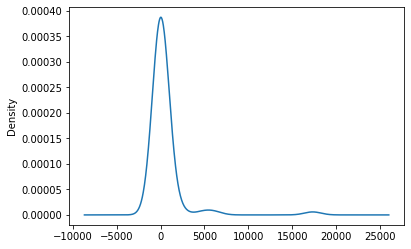

In [16]:
CLASSIFICATION_counts.plot.density()

from the density plot, we can see the majority has more than 1000 instances, so we can set 1000 as split point

In [17]:
new_CLASSIFICATION=list(CLASSIFICATION_counts[CLASSIFICATION_counts<1000].index)
for i in new_CLASSIFICATION:
    df1.CLASSIFICATION=df1.CLASSIFICATION.replace(i,"Other")
df1.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [18]:
enc=OneHotEncoder(sparse=False)

encode_df= pd.DataFrame(enc.fit_transform(df1.CLASSIFICATION.values.reshape(-1,1)))

encode_df.columns=enc.get_feature_names(["CLASSIFICATION"])
encode_df.head()

,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df2=df1.merge(encode_df,left_index=True,right_index=True).drop("CLASSIFICATION",1)
df2


,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,...,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other
0,ProductDev,Association,1,0,N,5000,1,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Preservation,Co-operative,1,1-9999,N,108590,1,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Preservation,Trust,1,10000-24999,N,6692,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Heathcare,Trust,1,100000-499999,N,142590,1,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34295,ProductDev,Association,1,0,N,5000,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,Preservation,Association,1,0,N,5000,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34297,ProductDev,Association,1,0,N,5000,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# USE_CASE variable
USE_CASE_counts=alphabet_df.USE_CASE.value_counts()
USE_CASE_counts

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

the USE_CASE variable has less then 10 unique value

In [21]:
enc=OneHotEncoder(sparse=False)
encode_df=pd.DataFrame(enc.fit_transform(df2.USE_CASE.values.reshape(-1,1)))

encode_df.columns=enc.get_feature_names(['USE_CASE'])
encode_df.head()

,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [22]:
df3=df2.merge(encode_df,left_index=True,right_index=True).drop("USE_CASE",1)
df3

,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,...,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev
0,Association,1,0,N,5000,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Co-operative,1,1-9999,N,108590,1,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Association,1,0,N,5000,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Trust,1,10000-24999,N,6692,1,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Trust,1,100000-499999,N,142590,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,Association,1,0,N,5000,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34295,Association,1,0,N,5000,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
34296,Association,1,0,N,5000,0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,Association,1,0,N,5000,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [23]:
# Organization variable

ORGANIZATION_counts=alphabet_df.ORGANIZATION.value_counts()
ORGANIZATION_counts

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

Organization variable also short length. 

In [24]:
enc=OneHotEncoder(sparse=False)
encode_df=pd.DataFrame(enc.fit_transform(df3.ORGANIZATION.values.reshape(-1,1)))
encode_df.columns=enc.get_feature_names(['ORGANIZATION'])
encode_df.head()

,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [25]:
df4=df3.merge(encode_df,right_index=True,left_index=True).drop("ORGANIZATION",1)
df4

,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,1,0,N,5000,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,1-9999,N,108590,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,N,5000,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1,10000-24999,N,6692,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,100000-499999,N,142590,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,0,N,5000,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
34295,1,0,N,5000,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
34296,1,0,N,5000,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
34297,1,0,N,5000,1,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [26]:
#STATUS counts
STATUS_counts = alphabet_df.STATUS.value_counts()
STATUS_counts

1    34294
0        5
Name: STATUS, dtype: int64

In [27]:
enc=OneHotEncoder(sparse=False)
encode_df=pd.DataFrame(enc.fit_transform(df4.STATUS.values.reshape(-1,1)))
encode_df.columns=enc.get_feature_names(['STATUS'])
encode_df.head()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,STATUS_0.0,STATUS_1.0
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [28]:
df5=df4.merge(encode_df,left_index=True,right_index=True).drop('STATUS',1)
df5

,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,STATUS_0.0,STATUS_1.0
0,0,N,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1-9999,N,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,N,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,10000-24999,N,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,100000-499999,N,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,N,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
34295,0,N,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
34296,0,N,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
34297,0,N,5000,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [29]:
#INCOME_AMT
INCOME_AMT_counts=alphabet_df.INCOME_AMT.value_counts()
INCOME_AMT_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [30]:
enc=OneHotEncoder(sparse=False)
encode_df=pd.DataFrame(enc.fit_transform(df5.INCOME_AMT.values.reshape(-1,1)))
encode_df.columns=enc.get_feature_names(['INCOME_AMT'])
encode_df.head()

,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df6=df5.merge(encode_df,left_index=True,right_index=True).drop("INCOME_AMT",1)
df6

,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,STATUS_1.0,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,N,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,N,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,N,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,N,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,N,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,N,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,N,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,N,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,N,5000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#SPECIAL CONSIDERATIONS
SPECIAL_CONSIDERATIONS_counts=alphabet_df.SPECIAL_CONSIDERATIONS.value_counts()
SPECIAL_CONSIDERATIONS_counts

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [33]:
enc = OneHotEncoder(sparse=False)

encode_df = pd.DataFrame(enc.fit_transform(df6.SPECIAL_CONSIDERATIONS.values.reshape(-1,1)))

encode_df.columns = enc.get_feature_names(['SPECIAL_CONSIDERATIONS'])
encode_df.head()

,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [34]:
df7 = df6.merge(encode_df,left_index=True,right_index=True).drop("SPECIAL_CONSIDERATIONS",1)
df7

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,5000,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
#ASK_AMT_counts
ASK_AMT_counts = alphabet_df.ASK_AMT.value_counts()
ASK_AMT_counts

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [36]:
df7.drop(columns=["ASK_AMT"],inplace=True)
df7.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
#IS_SUCCESSFUL
IS_SUCCESSFUL_counts = alphabet_df.IS_SUCCESSFUL.value_counts()
IS_SUCCESSFUL_counts

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [38]:
encode_df=pd.DataFrame(enc.fit_transform(df7.IS_SUCCESSFUL.values.reshape(-1,1)))
encode_df.columns=enc.get_feature_names(["IS_SUCCESSFUL"])
encode_df.head()

,IS_SUCCESSFUL_0,IS_SUCCESSFUL_1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [39]:
df8 = df7.merge(encode_df,left_index=True,right_index=True).drop("IS_SUCCESSFUL",1)
df8

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,IS_SUCCESSFUL_0,IS_SUCCESSFUL_1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
34295,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
34296,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
34297,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [40]:
df8.dtypes

APPLICATION_TYPE_Other          float64
APPLICATION_TYPE_T19            float64
APPLICATION_TYPE_T3             float64
APPLICATION_TYPE_T4             float64
APPLICATION_TYPE_T5             float64
APPLICATION_TYPE_T6             float64
AFFILIATION_CompanySponsored    float64
AFFILIATION_Family/Parent       float64
AFFILIATION_Independent         float64
AFFILIATION_National            float64
AFFILIATION_Other               float64
AFFILIATION_Regional            float64
CLASSIFICATION_C1000            float64
CLASSIFICATION_C1200            float64
CLASSIFICATION_C2000            float64
CLASSIFICATION_C2100            float64
CLASSIFICATION_C3000            float64
CLASSIFICATION_Other            float64
USE_CASE_CommunityServ          float64
USE_CASE_Heathcare              float64
USE_CASE_Other                  float64
USE_CASE_Preservation           float64
USE_CASE_ProductDev             float64
ORGANIZATION_Association        float64
ORGANIZATION_Co-operative       float64


In [41]:
df_cat=df8.dtypes[df8.dtypes=="float64"].index.tolist()
df_cat

['APPLICATION_TYPE_Other',
 'APPLICATION_TYPE_T19',
 'APPLICATION_TYPE_T3',
 'APPLICATION_TYPE_T4',
 'APPLICATION_TYPE_T5',
 'APPLICATION_TYPE_T6',
 'AFFILIATION_CompanySponsored',
 'AFFILIATION_Family/Parent',
 'AFFILIATION_Independent',
 'AFFILIATION_National',
 'AFFILIATION_Other',
 'AFFILIATION_Regional',
 'CLASSIFICATION_C1000',
 'CLASSIFICATION_C1200',
 'CLASSIFICATION_C2000',
 'CLASSIFICATION_C2100',
 'CLASSIFICATION_C3000',
 'CLASSIFICATION_Other',
 'USE_CASE_CommunityServ',
 'USE_CASE_Heathcare',
 'USE_CASE_Other',
 'USE_CASE_Preservation',
 'USE_CASE_ProductDev',
 'ORGANIZATION_Association',
 'ORGANIZATION_Co-operative',
 'ORGANIZATION_Corporation',
 'ORGANIZATION_Trust',
 'STATUS_0.0',
 'STATUS_1.0',
 'INCOME_AMT_0',
 'INCOME_AMT_1-9999',
 'INCOME_AMT_10000-24999',
 'INCOME_AMT_100000-499999',
 'INCOME_AMT_10M-50M',
 'INCOME_AMT_1M-5M',
 'INCOME_AMT_25000-99999',
 'INCOME_AMT_50M+',
 'INCOME_AMT_5M-10M',
 'SPECIAL_CONSIDERATIONS_N',
 'SPECIAL_CONSIDERATIONS_Y',
 'IS_SUCCESSF

In [42]:
df8[df_cat].nunique()

APPLICATION_TYPE_Other          2
APPLICATION_TYPE_T19            2
APPLICATION_TYPE_T3             2
APPLICATION_TYPE_T4             2
APPLICATION_TYPE_T5             2
APPLICATION_TYPE_T6             2
AFFILIATION_CompanySponsored    2
AFFILIATION_Family/Parent       2
AFFILIATION_Independent         2
AFFILIATION_National            2
AFFILIATION_Other               2
AFFILIATION_Regional            2
CLASSIFICATION_C1000            2
CLASSIFICATION_C1200            2
CLASSIFICATION_C2000            2
CLASSIFICATION_C2100            2
CLASSIFICATION_C3000            2
CLASSIFICATION_Other            2
USE_CASE_CommunityServ          2
USE_CASE_Heathcare              2
USE_CASE_Other                  2
USE_CASE_Preservation           2
USE_CASE_ProductDev             2
ORGANIZATION_Association        2
ORGANIZATION_Co-operative       2
ORGANIZATION_Corporation        2
ORGANIZATION_Trust              2
STATUS_0.0                      2
STATUS_1.0                      2
INCOME_AMT_0  

we can now start splitting the data set into training and testing. Follow by standardize bby using standardscaler
The is successful is our target columns  so we need to separate it out. since we already has both 0 and 1 columns, we can delete one of them

In [43]:
y=df8["IS_SUCCESSFUL_0"].values
X=df8.drop(["IS_SUCCESSFUL_0","IS_SUCCESSFUL_1"],1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


after splitting the train and test dataset, we can start using neural network

In [44]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [45]:
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 379
Trainable params: 379
Non-trainable params: 0
_________________________________________________________________


In [46]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
fit_model = nn.fit(X_train,y_train,epochs=100)

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 3s 104us/sample - loss: 0.6022 - accuracy: 0.6979
Epoch 2/100
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5694 - accuracy: 0.7241
Epoch 3/100
25724/25724 [==============================] - 2s 61us/sample - loss: 0.5644 - accuracy: 0.7261
Epoch 4/100
25724/25724 [==============================] - 2s 61us/sample - loss: 0.5616 - accuracy: 0.7271
Epoch 5/100
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5593 - accuracy: 0.7285
Epoch 6/100
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5575 - accuracy: 0.7296
Epoch 7/100
25724/25724 [==============================] - 2s 60us/sample - loss: 0.5565 - accuracy: 0.7292
Epoch 8/100
25724/25724 [==============================] - 2s 60us/sample - loss: 0.5558 - accuracy: 0.7306
Epoch 9/100
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5548 - accuracy: 0.7316
Epoc

25724/25724 [==============================] - 2s 60us/sample - loss: 0.5485 - accuracy: 0.7337
Epoch 77/100
25724/25724 [==============================] - 2s 59us/sample - loss: 0.5481 - accuracy: 0.7340
Epoch 78/100
25724/25724 [==============================] - 2s 58us/sample - loss: 0.5484 - accuracy: 0.7343
Epoch 79/100
25724/25724 [==============================] - 2s 59us/sample - loss: 0.5481 - accuracy: 0.7347
Epoch 80/100
25724/25724 [==============================] - 2s 59us/sample - loss: 0.5482 - accuracy: 0.7333
Epoch 81/100
25724/25724 [==============================] - 2s 61us/sample - loss: 0.5479 - accuracy: 0.7341
Epoch 82/100
25724/25724 [==============================] - 2s 59us/sample - loss: 0.5482 - accuracy: 0.7350
Epoch 83/100
25724/25724 [==============================] - 2s 59us/sample - loss: 0.5481 - accuracy: 0.7343
Epoch 84/100
25724/25724 [==============================] - 2s 58us/sample - loss: 0.5482 - accuracy: 0.7340
Epoch 85/100
25724/25724 [======

In [49]:
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 0s - loss: 0.5420 - accuracy: 0.7261
Loss: 0.5554309692535734, Accuracy: 0.726064145565033


In [50]:
#adding addition neuron in first hidden layer
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________


In [51]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
fit_model = nn.fit(X_train,y_train,epochs=100)

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 2s 94us/sample - loss: 0.6129 - accuracy: 0.6772
Epoch 2/100
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5698 - accuracy: 0.7231
Epoch 3/100
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5640 - accuracy: 0.7285
Epoch 4/100
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5611 - accuracy: 0.7294
Epoch 5/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5597 - accuracy: 0.7295
Epoch 6/100
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5583 - accuracy: 0.7296
Epoch 7/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5573 - accuracy: 0.7294
Epoch 8/100
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5565 - accuracy: 0.7311
Epoch 9/100
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5555 - accuracy: 0.7303
Epoch

25724/25724 [==============================] - 2s 65us/sample - loss: 0.5484 - accuracy: 0.7344
Epoch 77/100
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5486 - accuracy: 0.7327
Epoch 78/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5484 - accuracy: 0.7341
Epoch 79/100
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5482 - accuracy: 0.7341
Epoch 80/100
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5483 - accuracy: 0.7350
Epoch 81/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5481 - accuracy: 0.7350
Epoch 82/100
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5484 - accuracy: 0.7318
Epoch 83/100
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5481 - accuracy: 0.7339
Epoch 84/100
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5479 - accuracy: 0.7345
Epoch 85/100
25724/25724 [======

In [53]:
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 0s - loss: 0.5562 - accuracy: 0.7275
Loss: 0.5566208444392369, Accuracy: 0.7274635434150696


In [54]:
#adding addition neuron in first hidden layer
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 328       
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 389
Trainable params: 389
Non-trainable params: 0
_________________________________________________________________


In [55]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [56]:
fit_model = nn.fit(X_train,y_train,epochs=100)

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 3s 98us/sample - loss: 0.6086 - accuracy: 0.6891
Epoch 2/100
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5704 - accuracy: 0.7254
Epoch 3/100
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5647 - accuracy: 0.7274
Epoch 4/100
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5631 - accuracy: 0.7286
Epoch 5/100
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5615 - accuracy: 0.7289
Epoch 6/100
25724/25724 [==============================] - 2s 69us/sample - loss: 0.5609 - accuracy: 0.7287
Epoch 7/100
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5604 - accuracy: 0.7289
Epoch 8/100
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5597 - accuracy: 0.7297
Epoch 9/100
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5590 - accuracy: 0.7295
Epoch

25724/25724 [==============================] - 2s 66us/sample - loss: 0.5504 - accuracy: 0.7340
Epoch 76/100
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5503 - accuracy: 0.7343
Epoch 77/100
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5501 - accuracy: 0.7342
Epoch 78/100
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5504 - accuracy: 0.7340
Epoch 79/100
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5501 - accuracy: 0.7340
Epoch 80/100
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5498 - accuracy: 0.7339
Epoch 81/100
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5500 - accuracy: 0.7346
Epoch 82/100
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5502 - accuracy: 0.7336
Epoch 83/100
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5502 - accuracy: 0.7345
Epoch 84/100
25724/25724 [======

In [65]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [66]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
cp_callback = ModelCheckpoint(filepath=checkpoint_path,verbose=1,save_weights_only=True)

fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/100
25536/25724 [============================>.] - ETA: 0s - loss: 0.5607 - accuracy: 0.7313
Epoch 00001: saving model to checkpoints/weights.01.hdf5
25724/25724 [==============================] - 3s 104us/sample - loss: 0.5612 - accuracy: 0.7306
Epoch 2/100
25248/25724 [============================>.] - ETA: 0s - loss: 0.5584 - accuracy: 0.7311
Epoch 00002: saving model to checkpoints/weights.02.hdf5
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5584 - accuracy: 0.7310
Epoch 3/100
25088/25724 [============================>.] - ETA: 0s - loss: 0.5565 - accuracy: 0.7319
Epoch 00003: saving model to checkpoints/weights.03.hdf5
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5566 - accuracy: 0.7319
Epoch 4/100
25632/25724 [============================>.] - ETA: 0s - loss: 0.5558 - accuracy: 0.7327
Epoch 00004: saving model to checkpoints/weights.04.hdf5
25724/25724 [==============================] - 2s 68us/s

Epoch 33/100
24960/25724 [============================>.] - ETA: 0s - loss: 0.5486 - accuracy: 0.7351
Epoch 00033: saving model to checkpoints/weights.33.hdf5
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5493 - accuracy: 0.7347
Epoch 34/100
25472/25724 [============================>.] - ETA: 0s - loss: 0.5493 - accuracy: 0.7347
Epoch 00034: saving model to checkpoints/weights.34.hdf5
25724/25724 [==============================] - 2s 71us/sample - loss: 0.5493 - accuracy: 0.7348
Epoch 35/100
25632/25724 [============================>.] - ETA: 0s - loss: 0.5492 - accuracy: 0.7346
Epoch 00035: saving model to checkpoints/weights.35.hdf5
25724/25724 [==============================] - 2s 70us/sample - loss: 0.5491 - accuracy: 0.7348
Epoch 36/100
25536/25724 [============================>.] - ETA: 0s - loss: 0.5496 - accuracy: 0.7348
Epoch 00036: saving model to checkpoints/weights.36.hdf5
25724/25724 [==============================] - 2s 71us/sample - loss: 0.5492

25568/25724 [============================>.] - ETA: 0s - loss: 0.5485 - accuracy: 0.7351
Epoch 00065: saving model to checkpoints/weights.65.hdf5
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5484 - accuracy: 0.7351
Epoch 66/100
25440/25724 [============================>.] - ETA: 0s - loss: 0.5486 - accuracy: 0.7352
Epoch 00066: saving model to checkpoints/weights.66.hdf5
25724/25724 [==============================] - 2s 77us/sample - loss: 0.5480 - accuracy: 0.7355
Epoch 67/100
25056/25724 [============================>.] - ETA: 0s - loss: 0.5492 - accuracy: 0.7348
Epoch 00067: saving model to checkpoints/weights.67.hdf5
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5484 - accuracy: 0.7354
Epoch 68/100
25568/25724 [============================>.] - ETA: 0s - loss: 0.5481 - accuracy: 0.7354
Epoch 00068: saving model to checkpoints/weights.68.hdf5
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5480 - accuracy: 

25696/25724 [============================>.] - ETA: 0s - loss: 0.5474 - accuracy: 0.7359
Epoch 00097: saving model to checkpoints/weights.97.hdf5
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5476 - accuracy: 0.7357
Epoch 98/100
25312/25724 [============================>.] - ETA: 0s - loss: 0.5479 - accuracy: 0.7351
Epoch 00098: saving model to checkpoints/weights.98.hdf5
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5476 - accuracy: 0.7355
Epoch 99/100
25056/25724 [============================>.] - ETA: 0s - loss: 0.5471 - accuracy: 0.7358
Epoch 00099: saving model to checkpoints/weights.99.hdf5
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5471 - accuracy: 0.7362
Epoch 100/100
25056/25724 [============================>.] - ETA: 0s - loss: 0.5480 - accuracy: 0.7355
Epoch 00100: saving model to checkpoints/weights.100.hdf5
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5472 - accuracy

In [68]:
#load weights method to restore the model weights
#adding addition neuron in first hidden layer
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 6

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn_new.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
nn_new.load_weights("checkpoints/weights.100.hdf5")
model_loss,model_accuracy=nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss:{model_loss},Accuracy:{model_accuracy}")

8575/1 - 0s - loss: 0.5973 - accuracy: 0.7263
Loss:0.558029283114842,Accuracy:0.7262973785400391


In [69]:
#Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

In [71]:
#import the model to a new object
nn_imported=tf.keras.models.load_model('trained_attrition.h5')

In [73]:
model_loss,model_accuracy=nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss:{model_loss},Accuracy:{model_accuracy}")

8575/1 - 0s - loss: 0.5973 - accuracy: 0.7263
Loss:0.558029283114842,Accuracy:0.7262973785400391


The data is preprocessed and split into training and testing in order to be ready for modeling. In our first trial we are going to use the basic framework same as the one inside of the module.

Input Layer: we set up the input features equal to the number of variables in our feature Data Frame

Hidden Layers: we had 2 hidden layers and each of them has few neurons. For the hidden layer, we use “relu” for the activation function to identify nonlinear characteristics from the input value.

Output Layers: Sigmoid for activation function which help to predict the probability of having a good prediction on whether the funding is successful In our first deep learning model summary, we had 328 weight parameters for input values. This allows us to have great opportunity to find the trends in the dataset. 



Next we set up the “binary_crossentropy” as our loss function, adam for optimizer and we are looking for accuracy as our metrics. We set up epochs value to be 100 and run the model. The result shows 0.555 for loss and 72.6% accuracy. This value was not consider as low but not ideal at the same time. We are seeking for further change in order to check whether there can be an improvement in accuracy. Things we can do to change the model:
Add more neurons to hidden layer
Add hidden layer
Change the activation function for hidden layers
Increase the amount of epochs In this challenge, we first try to increase the amount of neurons from 8 into 10. This did not really increase the accuracy but makes the accuracy to reach ~73% at early stage. However, this seems to be unnecessary since we are setting up our epochs to be 100 and the accuracy does not seems to vary a lot. Even the basic framework does not require that much epochs to reach that accuracy.